# Import librairies et données



## Librairies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
import statannotations
from matplotlib.patches import Patch
from statannotations.Annotator import Annotator
import pingouin as pg
import os

## Données

In [57]:
os.chdir("C:/Users/Renée/Documents/Memoire/Masters_thesis/results/csv") 

In [58]:
data = pd.read_csv("data.csv")

In [59]:
to_remove = ["G09_10_06_P03.pklclean", "G09_16_06_P01.pklclean", 
             "G09_16_06_P02.pklclean", "G09_16_06_P06.pklclean"]
mask = ~data["photo"].isin(to_remove)
data = data[mask]
data

,sp,boite,mesure,photo,nodes,edges,cycle density,total hyphal length,spatial density,num cycles,vitesse de croissance,densité cycles /mm,edges/nodes
0,gigaspora,34,1,G09_10_06_P01.pklclean,188,199,0.063830,106.280808,0.802978,12,106.280808,0.112908,1.058511
1,gigaspora,34,1,G09_10_06_P02.pklclean,24,27,0.166667,20.240043,0.901219,4,20.240043,0.197628,1.125000
5,gigaspora,34,2,G09_16_06_P04.pklclean,58,60,0.051724,64.594493,0.308196,3,32.297247,0.046444,1.034483
6,gigaspora,34,2,G09_16_06_P05.pklclean,58,62,0.086207,94.365565,0.461584,5,47.182783,0.052985,1.068966
8,gigaspora,34,3,G09_23_06_P01.pklclean,1156,1341,0.160900,308.300518,4.749359,186,102.766839,0.603307,1.160035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,rhizophagus,25,4,R25_14_07_P19.pklclean,2052,2420,0.179825,514.113414,0.943986,369,128.528353,0.717740,1.179337
607,rhizophagus,25,4,R25_14_07_P20.pklclean,1691,1962,0.160852,492.714003,1.242359,272,123.178501,0.552044,1.160260
608,rhizophagus,25,4,R25_14_07_P21.pklclean,423,496,0.174941,117.030650,1.089573,74,29.257663,0.632313,1.172577
609,rhizophagus,25,4,R25_14_07_P22.pklclean,383,458,0.198433,82.384023,1.452783,76,20.596006,0.922509,1.195822


In [60]:
data_4 = data[data["mesure"] <= 4]
data_4.dropna()
data_4

,sp,boite,mesure,photo,nodes,edges,cycle density,total hyphal length,spatial density,num cycles,vitesse de croissance,densité cycles /mm,edges/nodes
0,gigaspora,34,1,G09_10_06_P01.pklclean,188,199,0.063830,106.280808,0.802978,12,106.280808,0.112908,1.058511
1,gigaspora,34,1,G09_10_06_P02.pklclean,24,27,0.166667,20.240043,0.901219,4,20.240043,0.197628,1.125000
5,gigaspora,34,2,G09_16_06_P04.pklclean,58,60,0.051724,64.594493,0.308196,3,32.297247,0.046444,1.034483
6,gigaspora,34,2,G09_16_06_P05.pklclean,58,62,0.086207,94.365565,0.461584,5,47.182783,0.052985,1.068966
8,gigaspora,34,3,G09_23_06_P01.pklclean,1156,1341,0.160900,308.300518,4.749359,186,102.766839,0.603307,1.160035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,rhizophagus,25,4,R25_14_07_P19.pklclean,2052,2420,0.179825,514.113414,0.943986,369,128.528353,0.717740,1.179337
607,rhizophagus,25,4,R25_14_07_P20.pklclean,1691,1962,0.160852,492.714003,1.242359,272,123.178501,0.552044,1.160260
608,rhizophagus,25,4,R25_14_07_P21.pklclean,423,496,0.174941,117.030650,1.089573,74,29.257663,0.632313,1.172577
609,rhizophagus,25,4,R25_14_07_P22.pklclean,383,458,0.198433,82.384023,1.452783,76,20.596006,0.922509,1.195822


In [6]:
data_degrees = pd.read_csv("data_degrees.csv")

In [7]:
mask = ~data_degrees["photo"].isin(to_remove)
data_degrees = data_degrees[mask]
data_degrees

,sp,boite,mesure,photo,degrees
0,gigaspora,34,1,G09_10_06_P01.pklclean,1
1,gigaspora,34,1,G09_10_06_P01.pklclean,1
2,gigaspora,34,1,G09_10_06_P01.pklclean,1
3,gigaspora,34,1,G09_10_06_P01.pklclean,3
4,gigaspora,34,1,G09_10_06_P01.pklclean,3
...,...,...,...,...,...
121998,rhizophagus,25,4,R25_14_07_P23.pklclean,1
121999,rhizophagus,25,4,R25_14_07_P23.pklclean,2
122000,rhizophagus,25,4,R25_14_07_P23.pklclean,1
122001,rhizophagus,25,4,R25_14_07_P23.pklclean,1


In [8]:
data_el = pd.read_csv("data_el.csv")

In [9]:
mask = ~data_el["photo"].isin(to_remove)
data_el = data_el[mask]
data_el

,sp,boite,mesure,photo,edge length
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.2991
1,gigaspora,34,1,G09_10_06_P01.pklclean,1.8697
2,gigaspora,34,1,G09_10_06_P01.pklclean,0.4838
3,gigaspora,34,1,G09_10_06_P01.pklclean,0.1584
4,gigaspora,34,1,G09_10_06_P01.pklclean,7.3274
...,...,...,...,...,...
1617767,rhizophagus,25,4,R25_14_07_P23.pklclean,0.1194
1617768,rhizophagus,25,4,R25_14_07_P23.pklclean,0.0980
1617769,rhizophagus,25,4,R25_14_07_P23.pklclean,0.0449
1617770,rhizophagus,25,4,R25_14_07_P23.pklclean,0.0945


In [10]:
data_er = pd.read_csv("data_er.csv")

In [11]:
mask = ~data_er["photo"].isin(to_remove)
data_er = data_er[mask]
data_er

,sp,boite,mesure,photo,global efficiency weighted,local efficiency weighted,average shortest path,robustness score
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.704926,0.085291,9.852433,0.000000
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.858067,0.111427,4.612884,0.222635
5,gigaspora,34,2,G09_16_06_P04.pklclean,0.812152,0.000000,10.697041,0.000000
6,gigaspora,34,2,G09_16_06_P05.pklclean,0.826012,0.091955,6.814044,0.211850
8,gigaspora,34,3,G09_23_06_P01.pklclean,0.644594,0.048065,6.966855,0.112349
...,...,...,...,...,...,...,...,...
536,rhizophagus,25,4,R25_14_07_P19.pklclean,0.690125,0.099645,17.311016,0.000000
537,rhizophagus,25,4,R25_14_07_P20.pklclean,0.717474,0.121267,12.022864,0.054212
538,rhizophagus,25,4,R25_14_07_P21.pklclean,0.736593,0.121367,8.206257,0.095090
539,rhizophagus,25,4,R25_14_07_P22.pklclean,0.733778,0.124113,6.252609,0.000000


In [12]:
data_er_4 = data_er[data_er["mesure"] <= 4]
data_er_4.dropna()
data_er_4

,sp,boite,mesure,photo,global efficiency weighted,local efficiency weighted,average shortest path,robustness score
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.704926,0.085291,9.852433,0.000000
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.858067,0.111427,4.612884,0.222635
5,gigaspora,34,2,G09_16_06_P04.pklclean,0.812152,0.000000,10.697041,0.000000
6,gigaspora,34,2,G09_16_06_P05.pklclean,0.826012,0.091955,6.814044,0.211850
8,gigaspora,34,3,G09_23_06_P01.pklclean,0.644594,0.048065,6.966855,0.112349
...,...,...,...,...,...,...,...,...
536,rhizophagus,25,4,R25_14_07_P19.pklclean,0.690125,0.099645,17.311016,0.000000
537,rhizophagus,25,4,R25_14_07_P20.pklclean,0.717474,0.121267,12.022864,0.054212
538,rhizophagus,25,4,R25_14_07_P21.pklclean,0.736593,0.121367,8.206257,0.095090
539,rhizophagus,25,4,R25_14_07_P22.pklclean,0.733778,0.124113,6.252609,0.000000


In [13]:
data_bc = pd.read_csv("data_bc.csv")

In [14]:
mask = ~data_bc["photo"].isin(to_remove)
data_bc = data_bc[mask]
data_bc

,sp,boite,mesure,photo,average bc nodes,average bc edges
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.085529,0.084967
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.182806,0.185990
5,gigaspora,34,2,G09_16_06_P04.pklclean,0.129494,0.137528
6,gigaspora,34,2,G09_16_06_P05.pklclean,0.114575,0.119616
8,rhizophagus,1,1,R01_16_06_P01.pklclean,0.108143,0.099459
...,...,...,...,...,...,...
540,rhizophagus,25,4,R25_14_07_P19.pklclean,0.030610,0.026343
541,rhizophagus,25,4,R25_14_07_P20.pklclean,0.023566,0.020797
542,rhizophagus,25,4,R25_14_07_P21.pklclean,0.052161,0.046289
543,rhizophagus,25,4,R25_14_07_P22.pklclean,0.060855,0.052808


In [15]:
angles = pd.read_csv("data_angles.csv")

In [16]:
mask = ~angles["photo"].isin(to_remove)
angles = angles[mask]
angles

,sp,boite,mesure,photo,angle
0,gigaspora,34,1,G09_10_06_P01.pklclean,-1.9270
1,gigaspora,34,1,G09_10_06_P01.pklclean,-1.9271
2,gigaspora,34,1,G09_10_06_P01.pklclean,-2.5796
3,gigaspora,34,1,G09_10_06_P01.pklclean,-2.2468
4,gigaspora,34,1,G09_10_06_P01.pklclean,-2.6449
...,...,...,...,...,...
1617767,rhizophagus,25,4,R25_14_07_P23.pklclean,-0.4673
1617768,rhizophagus,25,4,R25_14_07_P23.pklclean,-1.1012
1617769,rhizophagus,25,4,R25_14_07_P23.pklclean,-0.9868
1617770,rhizophagus,25,4,R25_14_07_P23.pklclean,-2.6533


### Données Cliff's delta

In [54]:
cliff_data = pd.read_csv('cliff_data.csv')

In [18]:
cliff_er = pd.read_csv('cliff_er.csv')

In [19]:
cliff_bc = pd.read_csv('cliff_bc.csv')

## Thème

In [61]:
os.chdir("../plots/plots_final")

In [21]:
sns.set_theme(style="whitegrid", context="paper", palette="pastel")

### Palettes de couleurs

In [22]:
pastel_blue = sns.color_palette("pastel")[0]  # Pour Gigaspora
pastel_orange = sns.color_palette("pastel")[1]  # Pour Rhizophagus

muted_blue = sns.color_palette("muted")[0]
muted_orange = sns.color_palette("muted")[1]

# Palettes custom
palette_pastel = {"gigaspora": pastel_blue, "rhizophagus": pastel_orange}
palette_muted = {"gigaspora": muted_blue, "rhizophagus": muted_orange}

### Légende custom

In [25]:
box_lines = [child for child in ax.get_children() if isinstance(child, plt.Line2D)]
box_outline_color = box_lines[0].get_color()

In [26]:
custom_legend = [Patch(facecolor=pastel_blue, edgecolor=box_outline_color, label=r"$\it{Gigaspora}$ sp."),
                 Patch(facecolor=pastel_orange, edgecolor=box_outline_color, label=r"$\it{R.\ irregularis}$")]

# Mesures de base

In [27]:
data

,sp,boite,mesure,photo,nodes,edges,cycle density,total hyphal length,spatial density,num cycles,vitesse de croissance,densité cycles /mm
0,gigaspora,34,1,G09_10_06_P01.pklclean,188,199,0.063830,106.280808,0.802978,12,106.280808,0.112908
1,gigaspora,34,1,G09_10_06_P02.pklclean,24,27,0.166667,20.240043,0.901219,4,20.240043,0.197628
5,gigaspora,34,2,G09_16_06_P04.pklclean,58,60,0.051724,64.594493,0.308196,3,32.297247,0.046444
6,gigaspora,34,2,G09_16_06_P05.pklclean,58,62,0.086207,94.365565,0.461584,5,47.182783,0.052985
8,gigaspora,34,3,G09_23_06_P01.pklclean,1156,1341,0.160900,308.300518,4.749359,186,102.766839,0.603307
...,...,...,...,...,...,...,...,...,...,...,...,...
606,rhizophagus,25,4,R25_14_07_P19.pklclean,2052,2420,0.179825,514.113414,0.943986,369,128.528353,0.717740
607,rhizophagus,25,4,R25_14_07_P20.pklclean,1691,1962,0.160852,492.714003,1.242359,272,123.178501,0.552044
608,rhizophagus,25,4,R25_14_07_P21.pklclean,423,496,0.174941,117.030650,1.089573,74,29.257663,0.632313
609,rhizophagus,25,4,R25_14_07_P22.pklclean,383,458,0.198433,82.384023,1.452783,76,20.596006,0.922509


## Nombre de noeuds

### Semaine 3

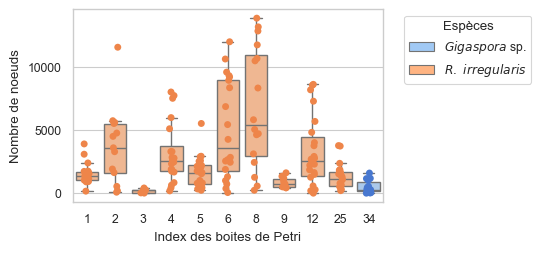

In [28]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="boite", y="nodes", data=data[data["mesure"] == 3], 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="boite", y="nodes", hue="sp", data=data[data["mesure"] == 3], 
              palette=palette_muted, dodge=False, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Nombre de noeuds par boite de Petri pour la semaine 3")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 5000, 10000])

fig.savefig("nodes_w3", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.261e-02 U_stat=6.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.566e-01 U_stat=1.600e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.585e-05 U_stat=3.885e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.168e-04 U_stat=6.505e+02


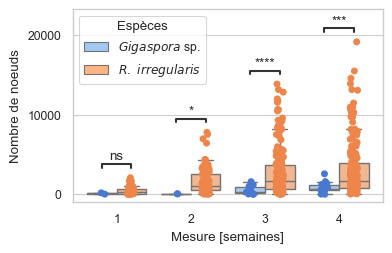

In [30]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="nodes", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="nodes", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Nombre de noeuds par espèce et mesure")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 10000, 20000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

In [63]:
metric_cols = ['nodes', 'edges', 'total hyphal length', 'cycle density', 'spatial density', 'vitesse de croissance', 'densité cycles /mm', 'edges/nodes']

data_4_mean = data_4.groupby(['boite', 'mesure'])[metric_cols].mean().reset_index()
data_4_mean['sp'] = data_4.groupby(['boite', 'mesure'])['sp'].first().values
data_4_mean.sort_values('sp', inplace=True)
data_4_mean

,boite,mesure,nodes,edges,total hyphal length,cycle density,spatial density,vitesse de croissance,densité cycles /mm,edges/nodes,sp
42,34,4,831.250000,963.312500,249.802660,0.133220,1.106650,62.450665,0.431567,1.118067,gigaspora
39,34,1,106.000000,113.000000,63.260426,0.115248,0.852099,63.260426,0.155268,1.091755,gigaspora
41,34,3,512.785714,583.500000,196.422863,0.109112,inf,65.474288,0.286990,1.065447,gigaspora
40,34,2,58.000000,61.000000,79.480029,0.068966,0.384890,39.740015,0.049715,1.051724,gigaspora
38,25,4,1344.347826,1552.304348,357.370747,0.143961,0.990949,89.342687,0.534397,1.142302,rhizophagus
23,6,4,6419.263158,8021.263158,1397.758740,0.238665,2.438877,349.439685,1.084554,1.238358,rhizophagus
24,8,1,289.500000,324.000000,162.116069,0.114758,0.546152,162.116069,0.208586,1.110982,rhizophagus
25,8,2,966.076923,1141.538462,271.248959,0.148869,1.825750,135.624479,0.573032,1.145038,rhizophagus
26,8,3,6810.812500,8645.437500,1391.361480,0.232885,2.713086,463.787160,1.089945,1.232323,rhizophagus
27,9,1,681.000000,786.000000,217.349110,0.155653,0.872239,217.349110,0.487695,1.154185,rhizophagus


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -1.00
1_gigaspora vs. 1_rhizophagus: Δ = -0.20
3_gigaspora vs. 3_rhizophagus: Δ = -0.80
4_gigaspora vs. 4_rhizophagus: Δ = -1.00


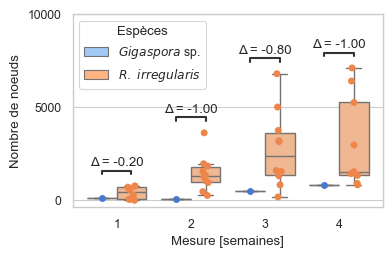

In [49]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="nodes", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="nodes", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Nombre de noeuds par espèce et mesure")
ax.set_ylabel("Nombre de noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 5000, 10000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'nodes')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

fig.savefig("nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Nombre de edges

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.261e-02 U_stat=6.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.271e-01 U_stat=1.500e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.526e-05 U_stat=3.875e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.336e-04 U_stat=6.520e+02


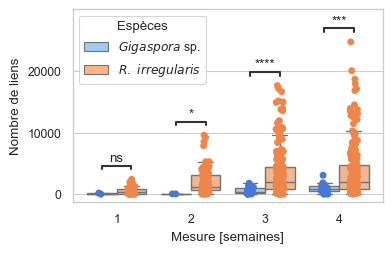

In [31]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="edges", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="edges", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Nombre de liens par espèce et mesure")
ax.set_ylabel("Nombre de liens")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 10000, 20000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="edges", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("edges", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -1.00
1_gigaspora vs. 1_rhizophagus: Δ = -0.20
3_gigaspora vs. 3_rhizophagus: Δ = -0.80
4_gigaspora vs. 4_rhizophagus: Δ = -1.00


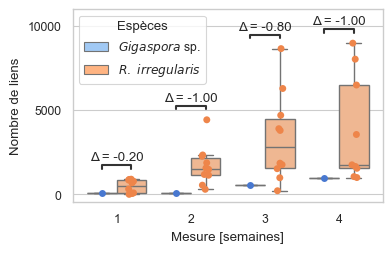

In [50]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="edges", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="edges", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Nombre de noeuds par espèce et mesure")
ax.set_ylabel("Nombre de liens")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 5000, 10000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'edges')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

fig.savefig("edges", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Rapport edges/nodes

### Mann Whitney

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:7.496e-03 U_stat=8.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.002e-01 U_stat=1.400e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.940e-04 U_stat=5.600e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.449e-02 U_stat=8.910e+02


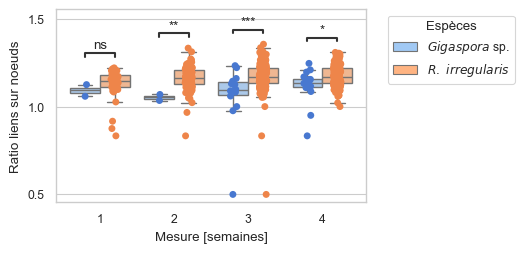

In [34]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="edges/nodes", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="edges/nodes", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          # loc="best")
          bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Ratio liens sur noeuds par espèce et mesure")
ax.set_ylabel("Ratio liens sur noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 1, 1.5])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="edges/nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("ratio_sp", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta 1point/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -0.80
1_gigaspora vs. 1_rhizophagus: Δ = -0.80
3_gigaspora vs. 3_rhizophagus: Δ = -1.00
4_gigaspora vs. 4_rhizophagus: Δ = -1.00


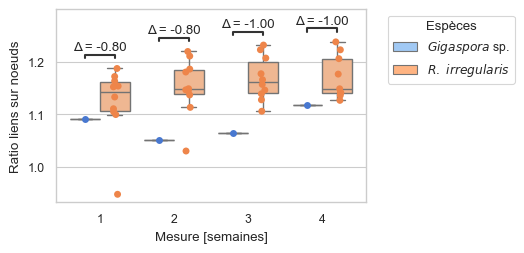

In [67]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="edges/nodes", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="edges/nodes", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          # loc="best")
          bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Ratio liens sur noeuds par espèce et mesure")
ax.set_ylabel("Ratio liens sur noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([1, 1.1, 1.2])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'edges_nodes')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

fig.savefig("ratio_sp", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Distibution des degrés

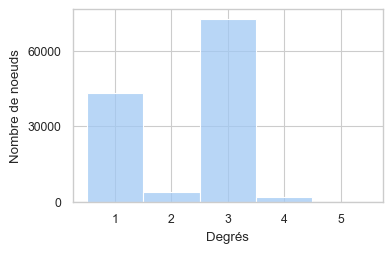

In [35]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.histplot(data=data_degrees, x="degrees", bins=2, discrete=True)

# ax.set_title("Distribution des degrés pour l'ensemble des données")
ax.set_xlabel("Degrés")
ax.set_ylabel("Nombre de noeuds")
ax.set_yticks([0, 30000, 60000])

fig.savefig("degrees", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Par espèce

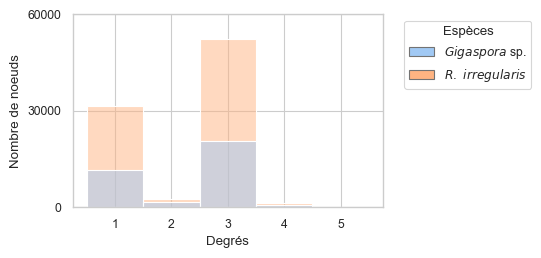

In [36]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.histplot(data=data_degrees, x="degrees", bins=2, 
                  hue="sp", palette=palette_pastel, discrete=True, legend=False)

ax.legend(title="Espèces", handles=custom_legend, 
          bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Distribution des degrés pour l'ensemble des données par espèce")
ax.set_xlabel("Degrés")
ax.set_ylabel("Nombre de noeuds")
ax.set_yticks([0, 30000, 60000])

fig.savefig("degrees_sp", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Cycle density

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.021e-02 U_stat=4.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.155e-01 U_stat=1.000e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.399e-05 U_stat=3.620e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.408e-03 U_stat=7.520e+02


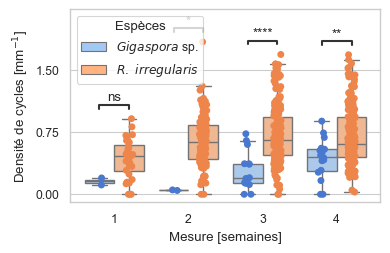

In [37]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="densité cycles /mm", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="densité cycles /mm", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Densité de cycles par espèce et mesure")
ax.set_ylabel("Densité de cycles [mm$^{-1}$]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.75, 1.5])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="densité cycles /mm", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("cycle_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [69]:
cycle_density_mean = data.groupby(
    ['boite', 'mesure']
)['densité cycles /mm'].mean().reset_index(name='densité cycles /mm')

cycle_density_mean['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values

cycle_density_mean = pd.DataFrame(cycle_density_mean)

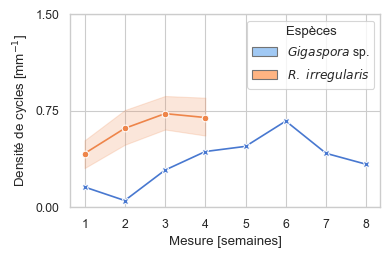

In [39]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="densité cycles /mm", data=cycle_density_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Évolution au cours du temps de la densité de cycles moyenne par espèce")
ax.set_ylabel("Densité de cycles [mm$^{-1}$]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.75, 1.5])


fig.savefig("cycle_density_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.021e-02 U_stat=4.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.155e-01 U_stat=1.000e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.399e-05 U_stat=3.620e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.408e-03 U_stat=7.520e+02


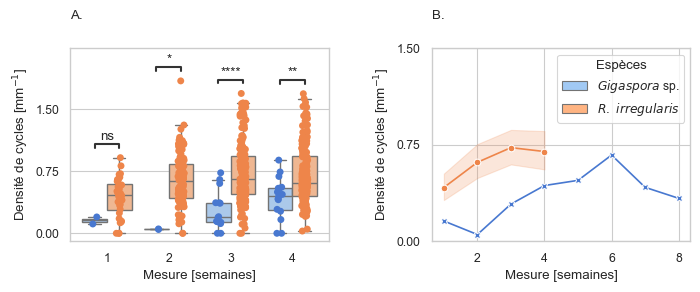

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="densité cycles /mm", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, 
                  legend=False, ax=ax1)

sns.stripplot(x="mesure", y="densité cycles /mm", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Densité de cycles par espèce et mesure")
ax1.set_ylabel("Densité de cycles [mm$^{-1}$]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.75, 1.5])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_4, x="mesure", y="densité cycles /mm", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="densité cycles /mm", data=cycle_density_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False,
                   legend=False, ax=ax2)

# ax2.set_title("Évolution au cours du temps de la densité de cycles moyenne par espèce")
ax2.set_ylabel("Densité de cycles [mm$^{-1}$]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.75, 1.5])

fig.subplots_adjust(wspace=0.4)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")
ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_cycle_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel avec cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -1.00
1_gigaspora vs. 1_rhizophagus: Δ = -0.80
3_gigaspora vs. 3_rhizophagus: Δ = -1.00
4_gigaspora vs. 4_rhizophagus: Δ = -1.00


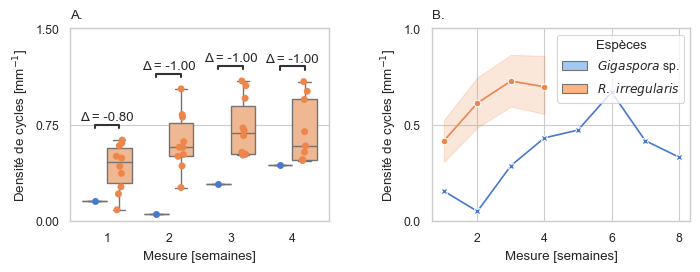

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="densité cycles /mm", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, 
                  legend=False, ax=ax1)

sns.stripplot(x="mesure", y="densité cycles /mm", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Densité de cycles par espèce et mesure")
ax1.set_ylabel("Densité de cycles [mm$^{-1}$]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.75, 1.5])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'cycle_density_mm')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="densité cycles /mm", data=cycle_density_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False,
                   legend=False, ax=ax2)

# ax2.set_title("Évolution au cours du temps de la densité de cycles moyenne par espèce")
ax2.set_ylabel("Densité de cycles [mm$^{-1}$]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.5, 1])

fig.subplots_adjust(wspace=0.4)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")
ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_cycle_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Total hyphal length

### Semaine 3

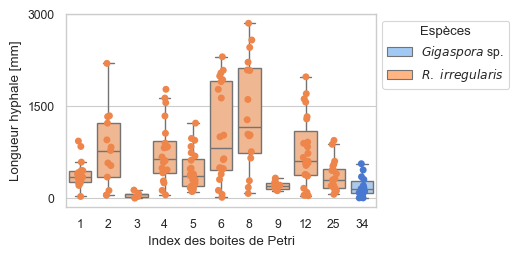

In [75]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="boite", y="total hyphal length", data=data[data["mesure"] == 3], 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="boite", y="total hyphal length", hue="sp", data=data[data["mesure"] == 3], 
              palette=palette_muted, dodge=False, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          bbox_to_anchor=(1, 1), loc="upper left")

# ax.set_title("Longueur hyphale par boite de Petri pour la semaine 3")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 1500, 3000])

fig.savefig("thl_w3", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Toutes les données

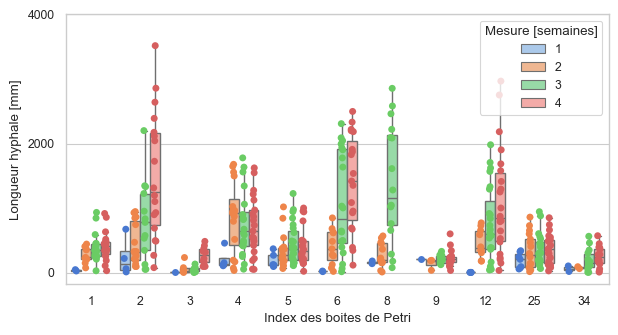

In [76]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="boite", y="total hyphal length", data=data_4, 
            palette="pastel", hue="mesure", showfliers=False)

sns.stripplot(x="boite", y="total hyphal length", hue="mesure", data=data_4, 
              palette="muted", dodge=True, legend=False)

ax.legend(title='Mesure [semaines]',
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Longueur hyphale par boite de Petri et par mesure")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Index des boites de Petri")
ax.set_yticks([0, 2000, 4000])

fig.savefig("thl_4", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.747e-02 U_stat=2.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.134e-01 U_stat=2.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.173e-04 U_stat=5.310e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-03 U_stat=6.990e+02


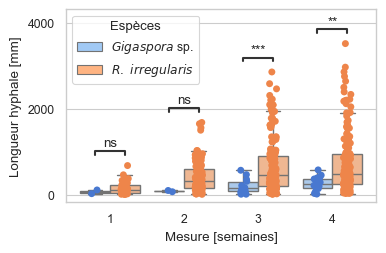

In [43]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="total hyphal length", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="total hyphal length", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Longueur hyphale par espèce et mesure")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 2000, 4000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="total hyphal length", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("thl", dpi=250, bbox_inches="tight", pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -0.80
1_gigaspora vs. 1_rhizophagus: Δ = -0.20
3_gigaspora vs. 3_rhizophagus: Δ = -0.80
4_gigaspora vs. 4_rhizophagus: Δ = -0.78


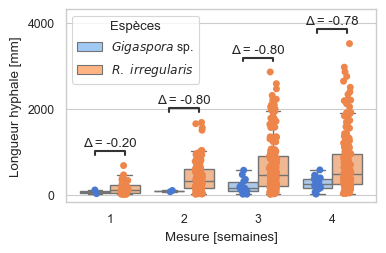

In [77]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="total hyphal length", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="total hyphal length", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Longueur hyphale par espèce et mesure")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 2000, 4000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'total_hyphal_length')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

fig.savefig("thl", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [78]:
thl_mean = data.groupby(
    ['boite', 'mesure']
)['total hyphal length'].mean().reset_index(name='total hyphal length')

thl_mean['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values

thl_mean = pd.DataFrame(thl_mean)

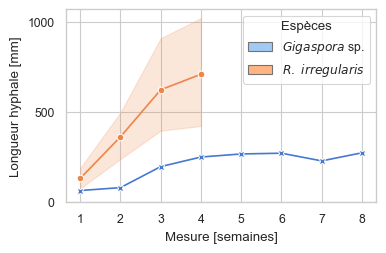

In [45]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Évolution au cours du temps de la longueur hyphale moyenne par espèce")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 500, 1000])


fig.savefig("thl_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

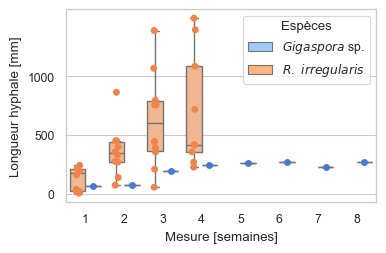

In [91]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="total hyphal length", data=thl_mean, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="total hyphal length", hue="sp", data=thl_mean, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Évolution au cours du temps de la longueur hyphale moyenne par espèce")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 500, 1000])


# fig.savefig("thl_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution par boites

C:\Users\Renée\AppData\Local\Temp\ipykernel_7424\295661367.py:3: UserWarning: 
The markers list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean,


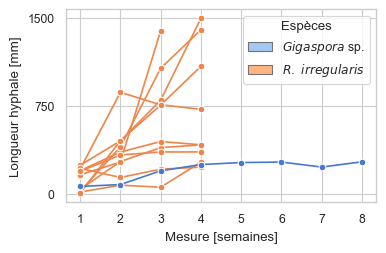

In [79]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean, 
                  palette=palette_muted, hue="sp", markers="o", style="boite", dashes=False)

ax.legend(title='Espèces', handles=custom_legend,
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Évolution au cours du temps de la longueur hyphale moyenne par boite de Petri")
ax.set_ylabel("Longueur hyphale [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 750, 1500])

fig.savefig("thl_mean_boites", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.747e-02 U_stat=2.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.134e-01 U_stat=2.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.173e-04 U_stat=5.310e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-03 U_stat=6.990e+02


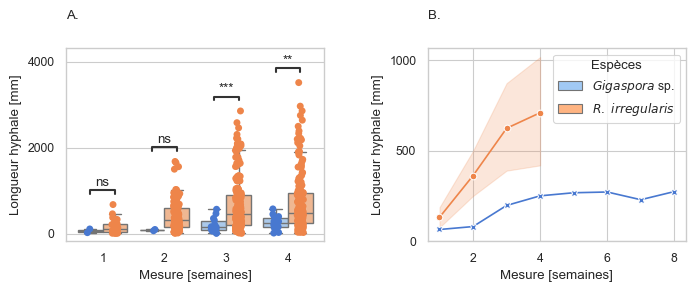

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="total hyphal length", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, 
                  legend=False, ax=ax1)

sns.stripplot(x="mesure", y="total hyphal length", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Longueur hyphale par espèce et mesure")
ax1.set_ylabel("Longueur hyphale [mm]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 2000, 4000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_4, x="mesure", y="total hyphal length", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution au cours du temps de la longueur hyphale moyenne par espèce")
ax2.set_ylabel("Longueur hyphale [mm]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 500, 1000])

fig.subplots_adjust(wspace=0.4)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_thl", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -0.80
1_gigaspora vs. 1_rhizophagus: Δ = -0.20
3_gigaspora vs. 3_rhizophagus: Δ = -0.80
4_gigaspora vs. 4_rhizophagus: Δ = -0.78


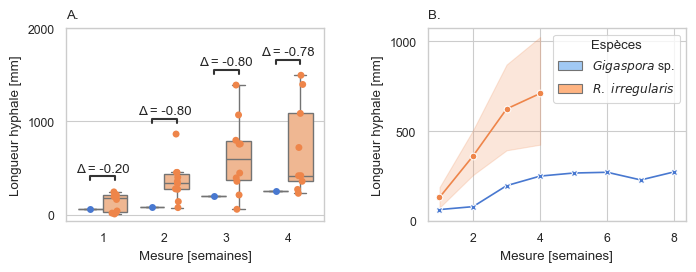

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="total hyphal length", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, 
                  legend=False, ax=ax1)

sns.stripplot(x="mesure", y="total hyphal length", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Longueur hyphale par espèce et mesure")
ax1.set_ylabel("Longueur hyphale [mm]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 1000, 2000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'total_hyphal_length')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="total hyphal length", data=thl_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution au cours du temps de la longueur hyphale moyenne par espèce")
ax2.set_ylabel("Longueur hyphale [mm]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 500, 1000])

fig.subplots_adjust(wspace=0.4)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_thl", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Spatial density

### Par espèces

Source : https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.999e-04 U_stat=0.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.747e-01 U_stat=1.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.953e-02 U_stat=8.385e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.917e-02 U_stat=8.720e+02


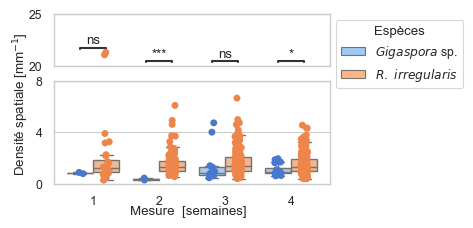

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(4, 2),
                              height_ratios=[0.5, 1])

ax1 = sns.boxplot(x="mesure", y="spatial density", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax1)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

ax2 = sns.boxplot(x="mesure", y="spatial density", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax2)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax2)

ax1.set_ylim(20, 25)
ax2.set_ylim(0, 8)

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("")

fig.text(0.05, 0.55, "Densité spatiale [mm$^{-1}$]", va="center", rotation="vertical")
fig.text(0.35, 0.01, "Mesure  [semaines]", va="center", rotation="horizontal")

ax1.get_legend().remove()
ax2.get_legend().remove()

ax1.legend(title='Espèces', handles=custom_legend, 
          # loc="best")
          bbox_to_anchor=(1, 1), loc="upper left")

ax1.set_yticks([20, 25])
ax2.set_yticks([0, 4, 8])

annotator = Annotator(ax1, pairs, data=data_4, x="mesure", y="spatial density", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.subplots_adjust(left=0.16, right=0.85, bottom=0.15, top=1)

fig.savefig("spatial_d_broken_axis", dpi=250, bbox_inches="tight", pad_inches=0.1)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.999e-04 U_stat=0.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.747e-01 U_stat=1.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.953e-02 U_stat=8.385e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.917e-02 U_stat=8.720e+02


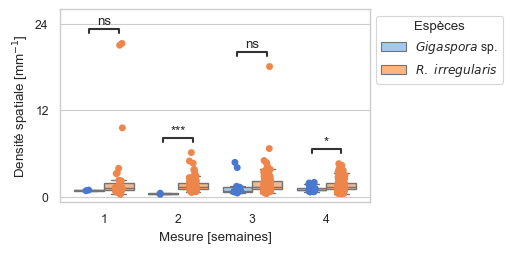

In [52]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="spatial density", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          # loc="best")
          bbox_to_anchor=(1, 1), loc="upper left")

# ax.set_title("Densité spatiale par espèce et mesure")
ax.set_ylabel("Densité spatiale [mm$^{-1}$]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 12, 24])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="spatial density", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("spatial_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [83]:
spatial_density = data.groupby(
    ['boite', 'mesure']
)['spatial density'].mean().reset_index(name='spatial density')

spatial_density['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values

spatial_density = pd.DataFrame(spatial_density)

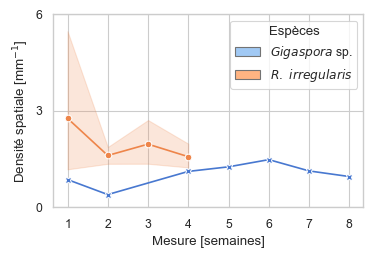

In [59]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="spatial density", data=spatial_density, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Évolution au cours du temps de la densité spatiale moyenne par espèce")
ax.set_ylabel("Densité spatiale [mm$^{-1}$]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 3, 6])


fig.savefig("spatial_density_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

In [87]:
import matplotlib.gridspec as gridspec

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.999e-04 U_stat=0.000e+00
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.747e-01 U_stat=1.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.953e-02 U_stat=8.385e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.917e-02 U_stat=8.720e+02


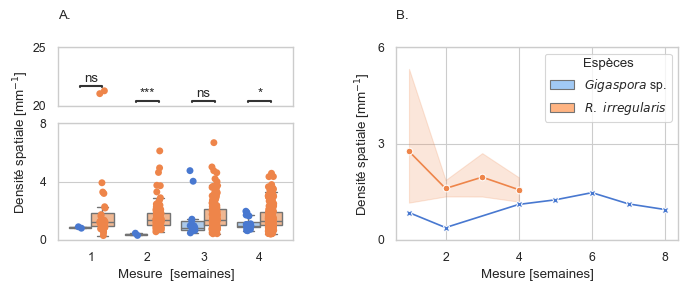

In [61]:
fig = plt.figure(figsize=(8, 2.5))

gs = fig.add_gridspec(nrows=2, ncols=2,
                      width_ratios=[1, 1.2], height_ratios=[0.5, 1],
                      wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0

ax2 = fig.add_subplot(gs[1, 0], sharex=ax1) # row 1, col 0

ax3 = fig.add_subplot(gs[:, 1]) # row all, col 1

ax1 = sns.boxplot(x="mesure", y="spatial density", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax1)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

ax2 = sns.boxplot(x="mesure", y="spatial density", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax2)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax2)

ax1.set_ylim(20, 25)
ax2.set_ylim(0, 8)

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("")

fig.text(0.065, 0.50, "Densité spatiale [mm$^{-1}$]", va="center", rotation="vertical")
fig.text(0.2, -0.03, "Mesure  [semaines]", va="center", rotation="horizontal")

ax1.get_legend().remove()
ax2.get_legend().remove()

ax1.set_yticks([20, 25])
ax2.set_yticks([0, 4, 8])
# ax1.set_title("Densité spatiale par espèce et mesure")

annotator = Annotator(ax1, pairs, data=data_4, x="mesure", y="spatial density", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax3 = sns.lineplot(x="mesure", y="spatial density", data=spatial_density, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax3.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax3.set_title("Évolution au cours du temps de la densité spatiale moyenne par espèce")
ax3.set_ylabel("Densité spatiale [mm$^{-1}$]")
ax3.set_xlabel("Mesure [semaines]")
ax3.set_yticks([0, 3, 6])

fig.align_labels([ax1, ax2, ax3])

fig.subplots_adjust(wspace=0.4)

pos1 = ax1.get_position()  
pos3 = ax3.get_position()

y_label = max(pos1.y1, pos3.y1) + 0.15 

fig.text(pos1.x0, y_label, "A.", va="top", ha="left")
fig.text(pos3.x0, y_label, "B.", va="top", ha="left")

fig.savefig("panel_spatial_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -1.00
1_gigaspora vs. 1_rhizophagus: Δ = -0.80
3_gigaspora vs. 3_rhizophagus: Δ = 0.90
4_gigaspora vs. 4_rhizophagus: Δ = -0.33


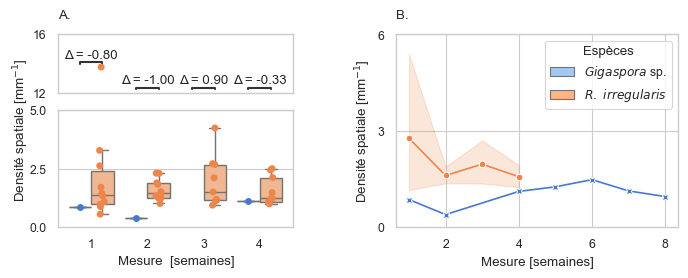

In [94]:
fig = plt.figure(figsize=(8, 2.5))

gs = fig.add_gridspec(nrows=2, ncols=2,
                      width_ratios=[1, 1.2], height_ratios=[0.5, 1],
                      wspace=0.4)

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0

ax2 = fig.add_subplot(gs[1, 0], sharex=ax1) # row 1, col 0

ax3 = fig.add_subplot(gs[:, 1]) # row all, col 1

ax1 = sns.boxplot(x="mesure", y="spatial density", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax1)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

ax2 = sns.boxplot(x="mesure", y="spatial density", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax2)

sns.stripplot(x="mesure", y="spatial density", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax2)

ax1.set_ylim(12, 16)
ax2.set_ylim(0, 5)

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("")

fig.text(0.065, 0.50, "Densité spatiale [mm$^{-1}$]", va="center", rotation="vertical")
fig.text(0.2, -0.03, "Mesure  [semaines]", va="center", rotation="horizontal")

ax1.get_legend().remove()
ax2.get_legend().remove()

ax1.set_yticks([12, 16])
ax2.set_yticks([0, 2.5, 5])
# ax1.set_title("Densité spatiale par espèce et mesure")

df_nodes = cliff_data[(cliff_data['metrics'] == 'spatial_density')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax3 = sns.lineplot(x="mesure", y="spatial density", data=spatial_density, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax3.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax3.set_title("Évolution au cours du temps de la densité spatiale moyenne par espèce")
ax3.set_ylabel("Densité spatiale [mm$^{-1}$]")
ax3.set_xlabel("Mesure [semaines]")
ax3.set_yticks([0, 3, 6])

fig.align_labels([ax1, ax2, ax3])

fig.subplots_adjust(wspace=0.4)

pos1 = ax1.get_position()  
pos3 = ax3.get_position()

y_label = max(pos1.y1, pos3.y1) + 0.1 

fig.text(pos1.x0, y_label, "A.", va="top", ha="left")
fig.text(pos3.x0, y_label, "B.", va="top", ha="left")

fig.savefig("panel_spatial_density", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Vitesse de croissance

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.747e-02 U_stat=2.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.134e-01 U_stat=2.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.173e-04 U_stat=5.310e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-03 U_stat=6.990e+02


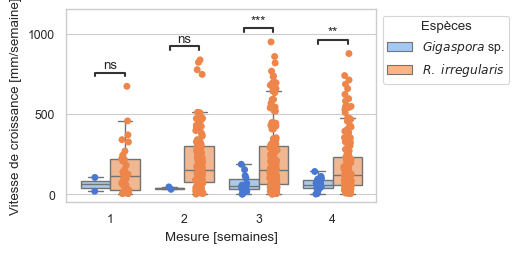

In [62]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="vitesse de croissance", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="vitesse de croissance", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          # loc="upper right")
          bbox_to_anchor=(1, 1), loc="upper left")

# ax.set_title("Vitesse de croissance par espèce et mesure")
ax.set_ylabel("Vitesse de croissance [mm/semaine]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 500, 1000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_4, x="mesure", y="vitesse de croissance", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("vitesse_croissance", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [95]:
croissance = data.groupby(
    ['boite', 'mesure']
)['vitesse de croissance'].mean().reset_index(name='croissance')

croissance['sp'] = data.groupby(['boite', 'mesure'])['sp'].first().values

croissance = pd.DataFrame(croissance)

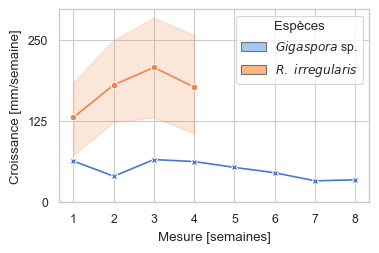

In [64]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="croissance", data=croissance, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Évolution au cours du temps de la croissance moyenne par espèce")
ax.set_ylabel("Croissance [mm/semaine]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 125, 250])


fig.savefig("croissance_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.747e-02 U_stat=2.800e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.134e-01 U_stat=2.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.173e-04 U_stat=5.310e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.437e-03 U_stat=6.990e+02


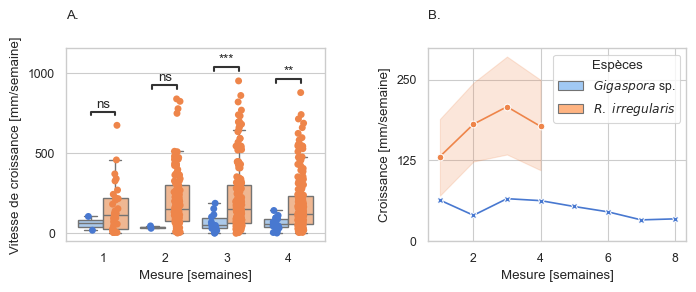

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="vitesse de croissance", data=data_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="vitesse de croissance", hue="sp", data=data_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)


# ax1.set_title("Vitesse de croissance par espèce et mesure")
ax1.set_ylabel("Vitesse de croissance [mm/semaine]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 500, 1000])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_4, x="mesure", y="vitesse de croissance", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="croissance", data=croissance, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution au cours du temps de la croissance moyenne par espèce")
ax2.set_ylabel("Croissance [mm/semaine]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 125, 250])

fig.subplots_adjust(wspace=0.4)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_croissance", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -0.80
1_gigaspora vs. 1_rhizophagus: Δ = -0.20
3_gigaspora vs. 3_rhizophagus: Δ = -0.80
4_gigaspora vs. 4_rhizophagus: Δ = -0.78


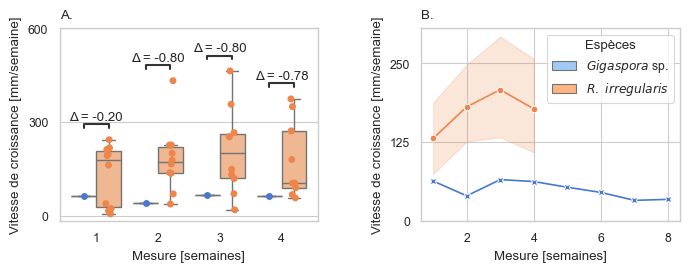

In [100]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="vitesse de croissance", data=data_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="vitesse de croissance", hue="sp", data=data_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)


# ax1.set_title("Vitesse de croissance par espèce et mesure")
ax1.set_ylabel("Vitesse de croissance [mm/semaine]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 300, 600])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_data[(cliff_data['metrics'] == 'vitesse_croisance')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_4_mean, x="mesure", y="nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="croissance", data=croissance, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution au cours du temps de la croissance moyenne par espèce")
ax2.set_ylabel("Vitesse de croissance [mm/semaine]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 125, 250])

fig.subplots_adjust(wspace=0.4)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_croissance", dpi=250, bbox_inches="tight", pad_inches=0.1)

# Longueur des liens

In [164]:
data = data_el[data_el["photo"] == "G09_29_07_P15.pklclean"]

In [165]:
data

,sp,boite,mesure,photo,edge length
95679,gigaspora,34,8,G09_29_07_P15.pklclean,3.6948
95680,gigaspora,34,8,G09_29_07_P15.pklclean,1.3062
95681,gigaspora,34,8,G09_29_07_P15.pklclean,11.9516
95682,gigaspora,34,8,G09_29_07_P15.pklclean,2.2882
95683,gigaspora,34,8,G09_29_07_P15.pklclean,2.9032
...,...,...,...,...,...
95757,gigaspora,34,8,G09_29_07_P15.pklclean,0.1541
95758,gigaspora,34,8,G09_29_07_P15.pklclean,0.1049
95759,gigaspora,34,8,G09_29_07_P15.pklclean,0.6679
95760,gigaspora,34,8,G09_29_07_P15.pklclean,0.0814


<Axes: xlabel='edge length', ylabel='Count'>

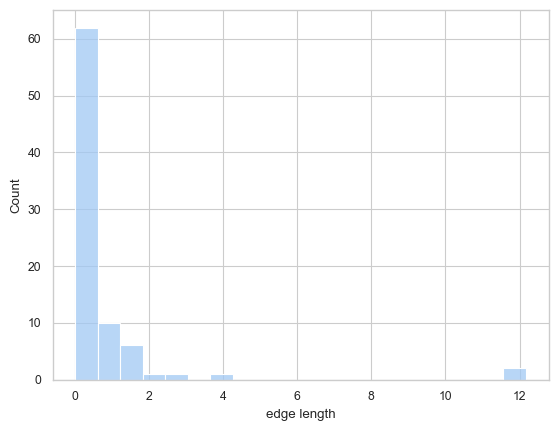

In [167]:
sns.histplot(data["edge length"], bins=20)

# Mesures d'efficience et de robustesse

In [102]:
metric_cols = ['global efficiency weighted',
               'local efficiency weighted',
               'average shortest path',
               'robustness score']

data_er_4_mean = data_er_4.groupby(['boite', 'mesure'])[metric_cols].mean().reset_index()
data_er_4_mean['sp'] = data_er_4.groupby(['boite', 'mesure'])['sp'].first().values
data_er_4_mean.sort_values('sp', inplace=True)
data_er_4_mean

,boite,mesure,global efficiency weighted,local efficiency weighted,average shortest path,robustness score,sp
43,34,4,0.691776,0.103543,12.853036,0.072671,gigaspora
40,34,1,0.781496,0.098359,7.232658,0.111318,gigaspora
42,34,3,0.731510,0.074306,10.199603,0.095876,gigaspora
41,34,2,0.819082,0.045978,8.755542,0.105925,gigaspora
39,25,4,0.705529,0.110172,14.112042,0.030579,rhizophagus
23,6,4,0.667217,0.124356,13.579599,0.029577,rhizophagus
24,8,1,0.744477,0.097038,13.685563,0.039444,rhizophagus
25,8,2,0.692355,0.095930,10.394417,0.031814,rhizophagus
26,8,3,0.676595,0.099770,12.960149,0.059790,rhizophagus
27,9,1,0.684139,0.083201,13.690828,0.092042,rhizophagus


## Efficience globale

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.148e-03 U_stat=2.140e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.365e-01 U_stat=4.400e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.255e-02 U_stat=1.294e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.050e-01 U_stat=1.182e+03


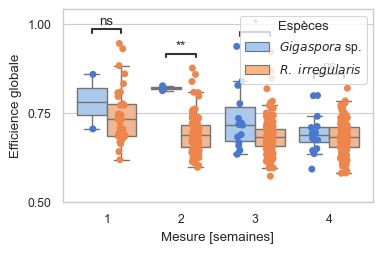

In [66]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="global efficiency weighted", data=data_er_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="global efficiency weighted", hue="sp", data=data_er_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Efficience globale par espèce et mesure")
ax.set_ylabel("Efficience globale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 0.75, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er_4, x="mesure", y="global efficiency weighted", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("global_eff", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [101]:
gew_mean = data_er.groupby(
    ['boite', 'mesure']
)['global efficiency weighted'].mean().reset_index(name='global efficiency weighted')
gew_mean['sp'] = data_er.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

gew_mean = pd.DataFrame(gew_mean)

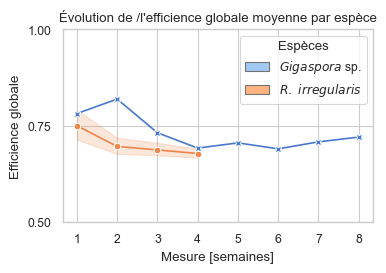

In [68]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="global efficiency weighted", data=gew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Évolution de /l'efficience globale moyenne par espèce")
ax.set_ylabel("Efficience globale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0.5, 0.75, 1])

fig.savefig("gew_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.148e-03 U_stat=2.140e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.365e-01 U_stat=4.400e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.255e-02 U_stat=1.294e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.050e-01 U_stat=1.182e+03


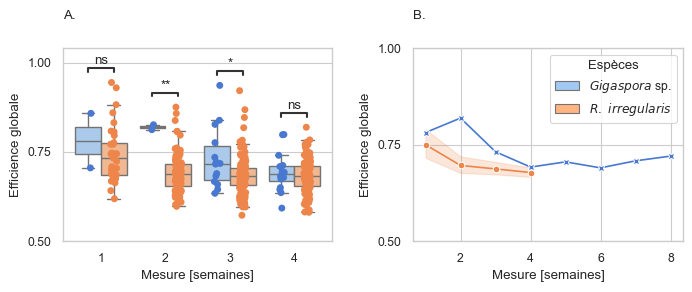

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="global efficiency weighted", data=data_er_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="global efficiency weighted", hue="sp", data=data_er_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Efficience globale par espèce et mesure")
ax1.set_ylabel("Efficience globale")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0.5, 0.75, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_er_4, x="mesure", y="global efficiency weighted", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="global efficiency weighted", data=gew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de l'efficience globale moyenne par espèce")
ax2.set_ylabel("Efficience globale")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0.5, 0.75, 1])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_gew", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = 1.00
1_gigaspora vs. 1_rhizophagus: Δ = 0.45
3_gigaspora vs. 3_rhizophagus: Δ = 0.80
4_gigaspora vs. 4_rhizophagus: Δ = 0.56


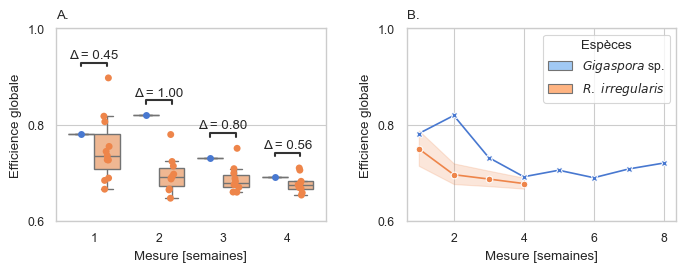

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="global efficiency weighted", data=data_er_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="global efficiency weighted", hue="sp", data=data_er_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Efficience globale par espèce et mesure")
ax1.set_ylabel("Efficience globale")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0.6, 0.8, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_er[(cliff_er['metrics'] == 'global_efficiency_weighted')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_er_4_mean, x="mesure", y="global efficiency weighted", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="global efficiency weighted", data=gew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de l'efficience globale moyenne par espèce")
ax2.set_ylabel("Efficience globale")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0.6, 0.8, 1])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_gew", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Efficience locale

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.990e-02 U_stat=2.700e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.629e-01 U_stat=3.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.968e-03 U_stat=5.030e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:7.539e-01 U_stat=1.020e+03


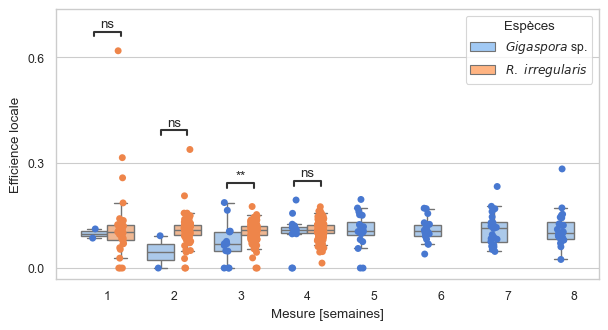

In [70]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="local efficiency weighted", data=data_er, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="local efficiency weighted", hue="sp", data=data_er, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Efficience locale par espèce et mesure")
ax.set_ylabel("Efficience locale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.3, 0.6])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er, x="mesure", y="local efficiency weighted", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("local_eff", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [110]:
lew_mean = data_er.groupby(
    ['boite', 'mesure']
)['local efficiency weighted'].mean().reset_index(name='local efficiency weighted')
lew_mean['sp'] = data_er.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

lew_mean = pd.DataFrame(lew_mean)

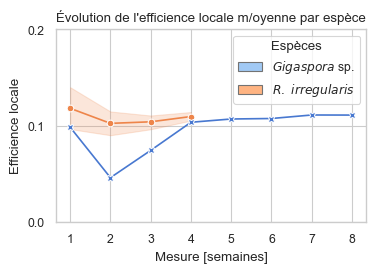

In [73]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.lineplot(x="mesure", y="local efficiency weighted", data=lew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax.set_title("Évolution de l'efficience locale m/oyenne par espèce")
ax.set_ylabel("Efficience locale")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.1, 0.2])

fig.savefig("lew_mean", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.990e-02 U_stat=2.700e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:8.629e-01 U_stat=3.100e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.968e-03 U_stat=5.030e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:7.539e-01 U_stat=1.020e+03


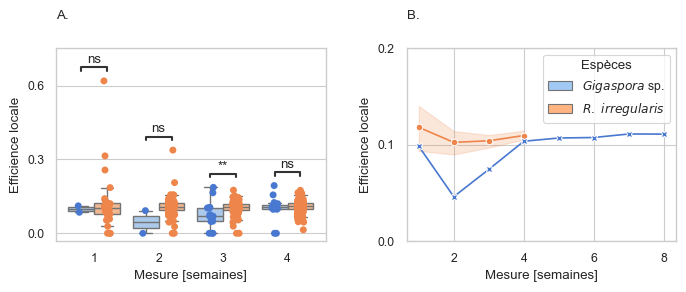

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="local efficiency weighted", data=data_er_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="local efficiency weighted", hue="sp", data=data_er_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Efficience locale par espèce et mesure")
ax1.set_ylabel("Efficience locale")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.3, 0.6])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_er_4, x="mesure", y="local efficiency weighted", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="local efficiency weighted", data=lew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de l'efficience locale moyenne par espèce")
ax2.set_ylabel("Efficience locale")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.1, 0.2])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_lew", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -1.00
1_gigaspora vs. 1_rhizophagus: Δ = -0.27
3_gigaspora vs. 3_rhizophagus: Δ = -1.00
4_gigaspora vs. 4_rhizophagus: Δ = -0.56


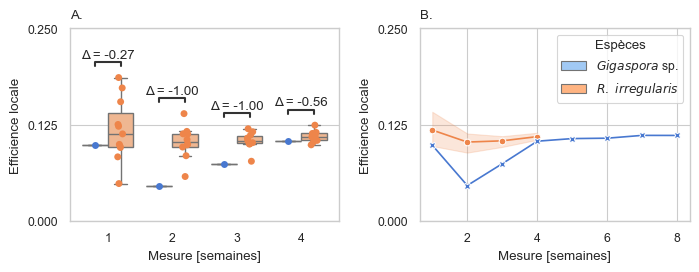

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="local efficiency weighted", data=data_er_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="local efficiency weighted", hue="sp", data=data_er_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Efficience locale par espèce et mesure")
ax1.set_ylabel("Efficience locale")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.125, 0.25])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_er[(cliff_er['metrics'] == 'local_efficiency_weighted')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_er_4_mean, x="mesure", y="global efficiency weighted", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="local efficiency weighted", data=lew_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de l'efficience locale moyenne par espèce")
ax2.set_ylabel("Efficience locale")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.125, 0.25])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="best")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_lew", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Average shortest path

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.992e-01 U_stat=5.900e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:9.175e-01 U_stat=3.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.571e-03 U_stat=5.430e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.771e-01 U_stat=8.930e+02


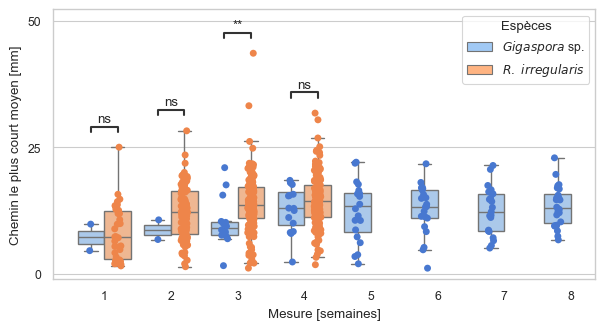

In [75]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="average shortest path", data=data_er, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="average shortest path", hue="sp", data=data_er, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Chemin le plus court moyen par espèce et mesure")
ax.set_ylabel("Chemin le plus court moyen [mm]")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 25, 50])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er, x="mesure", y="average shortest path", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("shortest_path", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Evolution

In [114]:
asp_mean = data_er.groupby(
    ['boite', 'mesure']
)['average shortest path'].mean().reset_index(name='average shortest path')
asp_mean['sp'] = data_er.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

asp_mean = pd.DataFrame(asp_mean)

### Panel

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.992e-01 U_stat=5.900e+01
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:9.175e-01 U_stat=3.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:6.571e-03 U_stat=5.430e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.771e-01 U_stat=8.930e+02


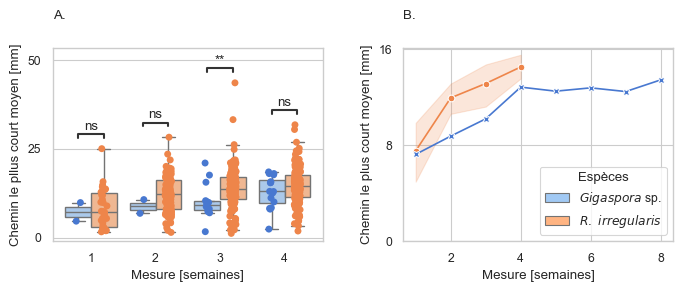

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="average shortest path", data=data_er_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="average shortest path", hue="sp", data=data_er_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Chemin le plus court moyen par espèce et mesure")
ax1.set_ylabel("Chemin le pllus court moyen [mm]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 25, 50])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_er_4, x="mesure", y="average shortest path", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="average shortest path", data=asp_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution du chemin le plus court moyen par espèce")
ax2.set_ylabel("Chemin le plus court moyen [mm]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 8, 16])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="lower right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_asp", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = -0.80
1_gigaspora vs. 1_rhizophagus: Δ = -0.09
3_gigaspora vs. 3_rhizophagus: Δ = -0.80
4_gigaspora vs. 4_rhizophagus: Δ = -0.78


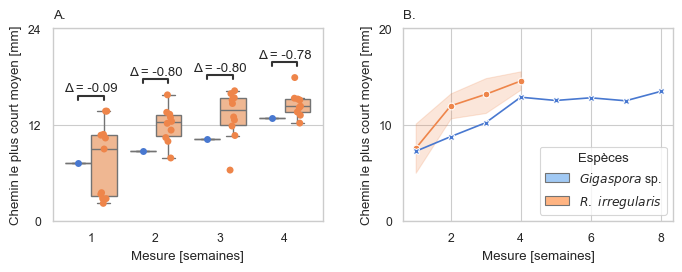

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="average shortest path", data=data_er_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="average shortest path", hue="sp", data=data_er_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Chemin le plus court moyen par espèce et mesure")
ax1.set_ylabel("Chemin le plus court moyen [mm]")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 12, 24])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_er[(cliff_er['metrics'] == 'average_shortest_path')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_er_4_mean, x="mesure", y="global efficiency weighted", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="average shortest path", data=asp_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution du chemin le plus court moyen par espèce")
ax2.set_ylabel("Chemin le plus court moyen [mm]")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 10, 20])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="lower right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_asp", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Robustness score

### Par espèces

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.980e-01 U_stat=1.390e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.295e-01 U_stat=4.250e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.767e-01 U_stat=8.890e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.497e-01 U_stat=1.191e+03


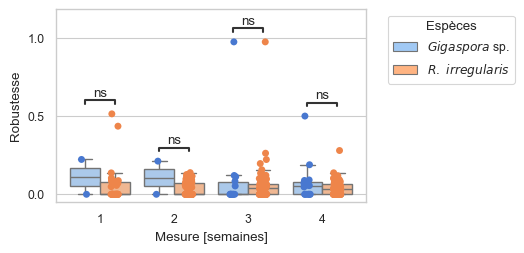

In [78]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="mesure", y="robustness score", data=data_er_4, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="robustness score", hue="sp", data=data_er_4, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          # loc="upper right")
          bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Robustesse par espèce et mesure")
ax.set_ylabel("Robustesse")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.5, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_er_4, x="mesure", y="robustness score", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("robustness", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

In [120]:
robustness_mean = data_er.groupby(
    ['boite', 'mesure']
)['robustness score'].mean().reset_index(name='robustness score')
robustness_mean['sp'] = data_er.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

robustness_mean = pd.DataFrame(robustness_mean)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.980e-01 U_stat=1.390e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.295e-01 U_stat=4.250e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:5.767e-01 U_stat=8.890e+02
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:4.497e-01 U_stat=1.191e+03


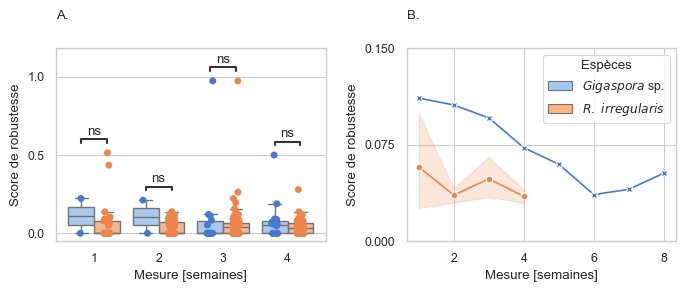

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="robustness score", data=data_er_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="robustness score", hue="sp", data=data_er_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Robustesse par espèce et mesure")
ax1.set_ylabel("Score de robustesse")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.5, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_er_4, x="mesure", y="robustness score", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="robustness score", data=robustness_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de la robustesse par espèce")
ax2.set_ylabel("Score de robustesse")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.075, 0.15])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_robustness", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = 1.00
1_gigaspora vs. 1_rhizophagus: Δ = 0.64
3_gigaspora vs. 3_rhizophagus: Δ = 0.80
4_gigaspora vs. 4_rhizophagus: Δ = 1.00


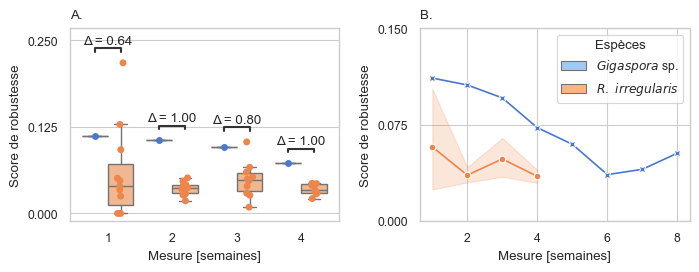

In [124]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="robustness score", data=data_er_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="robustness score", hue="sp", data=data_er_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Robustesse par espèce et mesure")
ax1.set_ylabel("Score de robustesse")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.125, 0.25])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_er[(cliff_er['metrics'] == 'robustness_score')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_er_4_mean, x="mesure", y="global efficiency weighted", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="robustness score", data=robustness_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de la robustesse par espèce")
ax2.set_ylabel("Score de robustesse")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.075, 0.15])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_robustness", dpi=250, bbox_inches="tight", pad_inches=0.1)

# Betweenness centrality

In [125]:
data_bc_4 = data_bc[data_bc["mesure"] <= 4]
data_bc_4.dropna()
data_bc_4

,sp,boite,mesure,photo,average bc nodes,average bc edges
0,gigaspora,34,1,G09_10_06_P01.pklclean,0.085529,0.084967
1,gigaspora,34,1,G09_10_06_P02.pklclean,0.182806,0.185990
5,gigaspora,34,2,G09_16_06_P04.pklclean,0.129494,0.137528
6,gigaspora,34,2,G09_16_06_P05.pklclean,0.114575,0.119616
8,rhizophagus,1,1,R01_16_06_P01.pklclean,0.108143,0.099459
...,...,...,...,...,...,...
540,rhizophagus,25,4,R25_14_07_P19.pklclean,0.030610,0.026343
541,rhizophagus,25,4,R25_14_07_P20.pklclean,0.023566,0.020797
542,rhizophagus,25,4,R25_14_07_P21.pklclean,0.052161,0.046289
543,rhizophagus,25,4,R25_14_07_P22.pklclean,0.060855,0.052808


In [126]:
metric_cols = ['average bc nodes',
               'average bc edges']

data_bc_4_mean = data_bc_4.groupby(['boite', 'mesure'])[metric_cols].mean().reset_index()
data_bc_4_mean['sp'] = data_bc_4.groupby(['boite', 'mesure'])['sp'].first().values
data_bc_4_mean.sort_values('sp', inplace=True)
data_bc_4_mean

,boite,mesure,average bc nodes,average bc edges,sp
43,34,4,0.068025,0.076141,gigaspora
40,34,1,0.134168,0.135479,gigaspora
42,34,3,0.067939,0.140108,gigaspora
41,34,2,0.122035,0.128572,gigaspora
39,25,4,0.046761,0.042727,rhizophagus
23,6,4,0.031226,0.026253,rhizophagus
24,8,1,0.079726,0.074853,rhizophagus
25,8,2,0.055047,0.052439,rhizophagus
26,8,3,0.031474,0.028124,rhizophagus
27,9,1,0.060358,0.053414,rhizophagus


## Noeuds

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.159e-02 U_stat=2.130e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.492e-01 U_stat=4.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.912e-02 U_stat=1.300e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.689e-02 U_stat=1.436e+03


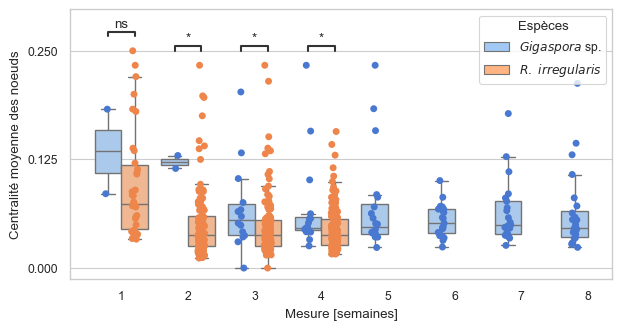

In [82]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="average bc nodes", data=data_bc, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="average bc nodes", hue="sp", data=data_bc, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Centralité moyenne des noeuds par espèce et mesure")
ax.set_ylabel("Centralité moyenne des noeuds")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.125, 0.25])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_bc, x="mesure", y="average bc nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("bc_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

In [127]:
bc_mean = data_bc.groupby(
    ['boite', 'mesure']
)['average bc nodes'].mean().reset_index(name='average bc nodes')
bc_mean['sp'] = data_bc.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

bc_mean = pd.DataFrame(bc_mean)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.159e-02 U_stat=2.130e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.492e-01 U_stat=4.900e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:3.912e-02 U_stat=1.300e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.689e-02 U_stat=1.436e+03


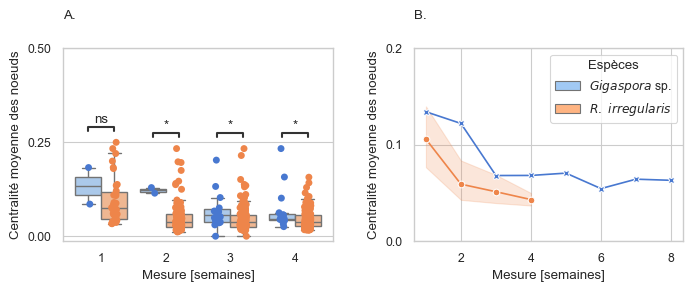

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="average bc nodes", data=data_bc_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="average bc nodes", hue="sp", data=data_bc_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Centralité moyenne des noeuds par espèce et mesure")
ax1.set_ylabel("Centralité moyenne des noeuds")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.25, 0.5])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_bc_4, x="mesure", y="average bc nodes", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="average bc nodes", data=bc_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de la centralité moyenne des noeuds par espèce")
ax2.set_ylabel("Centralité moyenne des noeuds")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.1, 0.2])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_bc_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = 0.80
1_gigaspora vs. 1_rhizophagus: Δ = 0.45
3_gigaspora vs. 3_rhizophagus: Δ = 0.80
4_gigaspora vs. 4_rhizophagus: Δ = 1.00


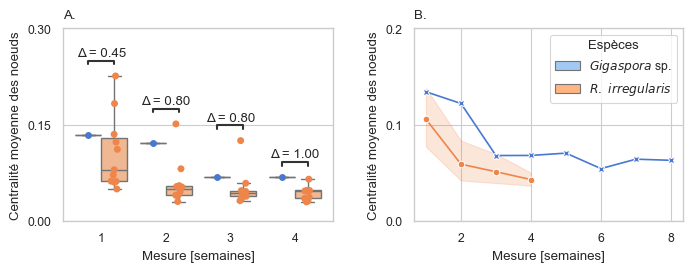

In [129]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="average bc nodes", data=data_bc_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="average bc nodes", hue="sp", data=data_bc_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Centralité moyenne des noeuds par espèce et mesure")
ax1.set_ylabel("Centralité moyenne des noeuds")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.15, 0.3])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_bc[(cliff_bc['metrics'] == 'average_bc_nodes')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_bc_4_mean, x="mesure", y="average bc nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="average bc nodes", data=bc_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de la centralité moyenne des noeuds par espèce")
ax2.set_ylabel("Centralité moyenne des noeuds")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.1, 0.2])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_bc_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

## Liens

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.919e-02 U_stat=2.140e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.571e-01 U_stat=5.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.819e-03 U_stat=1.446e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.732e-02 U_stat=1.435e+03


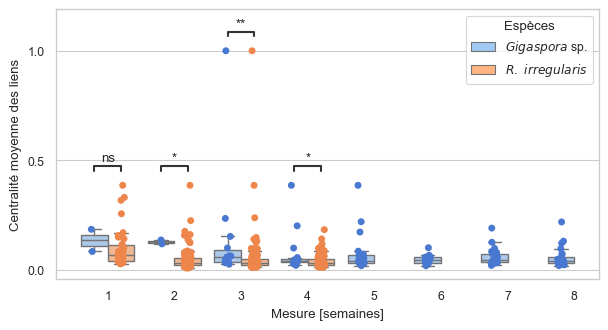

In [85]:
fig, ax = plt.subplots(figsize=(7, 3.5))

ax = sns.boxplot(x="mesure", y="average bc edges", data=data_bc, 
            palette=palette_pastel, hue="sp", showfliers=False)

sns.stripplot(x="mesure", y="average bc edges", hue="sp", data=data_bc, 
              palette=palette_muted, dodge=True, legend=False)

ax.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

# ax.set_title("Centralité moyenne des liens par espèce et mesure")
ax.set_ylabel("Centralité moyenne des liens")
ax.set_xlabel("Mesure [semaines]")
ax.set_yticks([0, 0.5, 1])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax, pairs, data=data_bc, x="mesure", y="average bc edges", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

fig.savefig("bc_nodes", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Panel

In [130]:
bce_mean = data_bc.groupby(
    ['boite', 'mesure']
)['average bc edges'].mean().reset_index(name='average bc edges')
bce_mean['sp'] = data_bc.groupby(['boite', 'mesure'])['sp'].first().values # ajouter le nom des espèces

bce_mean = pd.DataFrame(bce_mean)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:1.919e-02 U_stat=2.140e+02
1_gigaspora vs. 1_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.571e-01 U_stat=5.200e+01
3_gigaspora vs. 3_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.819e-03 U_stat=1.446e+03
4_gigaspora vs. 4_rhizophagus: Mann-Whitney-Wilcoxon test two-sided, P_val:2.732e-02 U_stat=1.435e+03


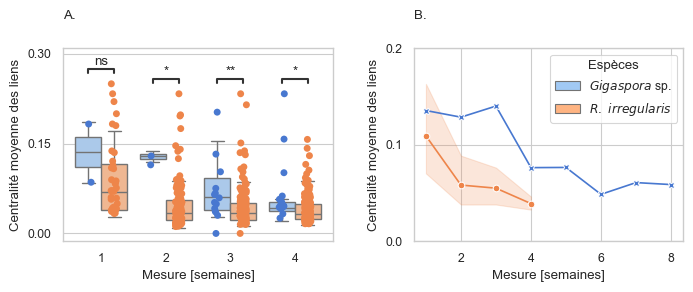

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="average bc edges", data=data_bc_4, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="average bc nodes", hue="sp", data=data_bc_4, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Centralité moyenne des liens par espèce et mesure")
ax1.set_ylabel("Centralité moyenne des liens")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.15, 0.3])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

annotator = Annotator(ax1, pairs, data=data_bc_4, x="mesure", y="average bc edges", hue="sp")
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

ax2 = sns.lineplot(x="mesure", y="average bc edges", data=bce_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de la centralité moyenne des liens par espèce")
ax2.set_ylabel("Centralité moyenne des liens")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.1, 0.2])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.2, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.2, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_bc_edges", dpi=250, bbox_inches="tight", pad_inches=0.1)

### Cliff's delta et 1/boite

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2_gigaspora vs. 2_rhizophagus: Δ = 0.80
1_gigaspora vs. 1_rhizophagus: Δ = 0.64
3_gigaspora vs. 3_rhizophagus: Δ = 0.80
4_gigaspora vs. 4_rhizophagus: Δ = 1.00


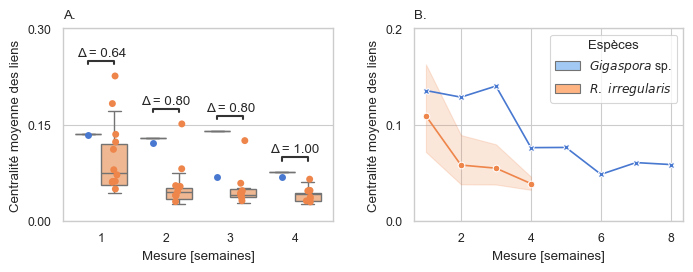

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, 
                               sharey=False, figsize=(8, 2.5))

ax1 = sns.boxplot(x="mesure", y="average bc edges", data=data_bc_4_mean, 
            palette=palette_pastel, hue="sp", showfliers=False, legend=False, ax=ax1)

sns.stripplot(x="mesure", y="average bc nodes", hue="sp", data=data_bc_4_mean, 
              palette=palette_muted, dodge=True, legend=False, ax=ax1)

# ax1.set_title("Centralité moyenne des liens par espèce et mesure")
ax1.set_ylabel("Centralité moyenne des liens")
ax1.set_xlabel("Mesure [semaines]")
ax1.set_yticks([0, 0.15, 0.3])

unique_mesures = [1, 2, 3, 4]
pairs = [((m, "gigaspora"), (m, "rhizophagus")) for m in unique_mesures]

df_nodes = cliff_bc[(cliff_bc['metrics'] == 'average_bc_edges')].copy()
df_nodes = df_nodes.set_index('weeks').loc[unique_mesures].reset_index()

custom_values = [f"Δ = {val:.2f}" for val in df_nodes['cliffs_delta']]

annotator = Annotator(ax=ax1, pairs=pairs, data=data_bc_4_mean, x="mesure", y="average bc nodes", hue="sp")

annotator.set_custom_annotations(custom_values)
annotator.annotate()

ax2 = sns.lineplot(x="mesure", y="average bc edges", data=bce_mean, 
                  palette=palette_muted, hue="sp", markers=True, style="sp", dashes=False, ax=ax2)

# ax2.set_title("Évolution de la centralité moyenne des liens par espèce")
ax2.set_ylabel("Centralité moyenne des liens")
ax2.set_xlabel("Mesure [semaines]")
ax2.set_yticks([0, 0.1, 0.2])

fig.subplots_adjust(wspace=0.3)

ax2.legend(title='Espèces', handles=custom_legend, 
          loc="upper right")
          # bbox_to_anchor=(1.05, 1), loc="upper left")

ax1.text(0, 1.1, "A.", va="top", ha="left", transform=ax1.transAxes)
ax2.text(0, 1.1, "B.", va="top", ha="left", transform=ax2.transAxes)

fig.savefig("panel_bc_edges", dpi=250, bbox_inches="tight", pad_inches=0.1)

# Angles

In [174]:
angles

,sp,boite,mesure,photo,angle
0,gigaspora,34,1,G09_10_06_P01.pklclean,-1.9270
1,gigaspora,34,1,G09_10_06_P01.pklclean,-1.9271
2,gigaspora,34,1,G09_10_06_P01.pklclean,-2.5796
3,gigaspora,34,1,G09_10_06_P01.pklclean,-2.2468
4,gigaspora,34,1,G09_10_06_P01.pklclean,-2.6449
...,...,...,...,...,...
1617767,rhizophagus,25,4,R25_14_07_P23.pklclean,-0.4673
1617768,rhizophagus,25,4,R25_14_07_P23.pklclean,-1.1012
1617769,rhizophagus,25,4,R25_14_07_P23.pklclean,-0.9868
1617770,rhizophagus,25,4,R25_14_07_P23.pklclean,-2.6533


In [175]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True, fill=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : .BarContainer or list of a single .Polygon
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=fill, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [186]:
data = angles[angles["photo"] == "G09_29_07_P15.pklclean"]
data = data["angle"].to_numpy()
data

array([-2.6100e-02, -7.9620e-01, -3.0843e+00, -4.8500e-02, -2.8491e+00,
       -9.6300e-02, -1.2511e+00, -1.3016e+00, -7.8500e-02, -1.1860e-01,
       -2.2121e+00,  1.7000e-03, -3.8760e-01, -1.9211e+00, -1.1380e-01,
       -1.5670e-01, -2.7400e-02, -7.4220e-01, -2.0210e+00, -1.5910e-01,
       -6.2400e-02, -2.9403e+00, -1.4916e+00, -2.6670e-01, -1.5168e+00,
       -9.8200e-02, -2.9822e+00, -2.2044e+00, -2.0610e-01, -7.4850e-01,
       -1.5708e+00, -2.8624e+00, -1.6660e-01, -7.5650e-01,  2.3100e-02,
       -2.2146e+00, -1.2830e-01, -2.0291e+00, -3.2940e-01, -3.0870e-01,
       -1.7335e+00, -9.2500e-02, -2.6292e+00, -5.8270e-01, -3.0509e+00,
       -2.5302e+00, -2.7300e-01, -1.8370e-01, -1.6194e+00, -1.0133e+00,
       -3.0953e+00, -2.1400e-01, -2.5910e-01, -1.8647e+00, -3.0120e-01,
       -1.6227e+00, -1.3290e-01, -1.3020e-01, -1.6028e+00, -2.1703e+00,
       -5.8550e-01, -4.5400e-02, -3.5990e-01, -1.5810e-01, -3.1028e+00,
       -2.5196e+00, -7.1930e-01, -6.3650e-01, -2.3502e+00, -1.24

In [184]:
fill_colors = sns.color_palette("pastel", n_colors=1)
edge_colors = sns.color_palette("muted", n_colors=1)

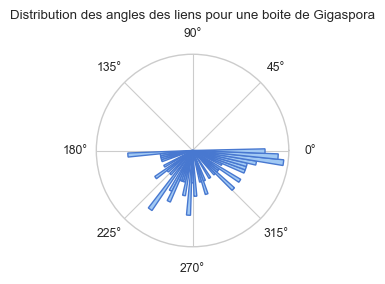

In [187]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(4, 2.5))

n, bins, patches = circular_hist(ax, data, bins=50, density=True, offset=0, gaps=True)

for i, bar in enumerate(patches):
    bar.set_facecolor(fill_colors[i % len(fill_colors)])
    if hasattr(bar, "set_edgecolor"):
        bar.set_edgecolor(edge_colors[i % len(edge_colors)])
    else:
        bar.set(ec=edge_colors[i % len(edge_colors)])

ax.set_title("Distribution des angles des liens pour une boite de Gigaspora")

fig.savefig("angles", dpi=250, bbox_inches="tight", pad_inches=0.1)

Text(0, 1.2, '(a)')

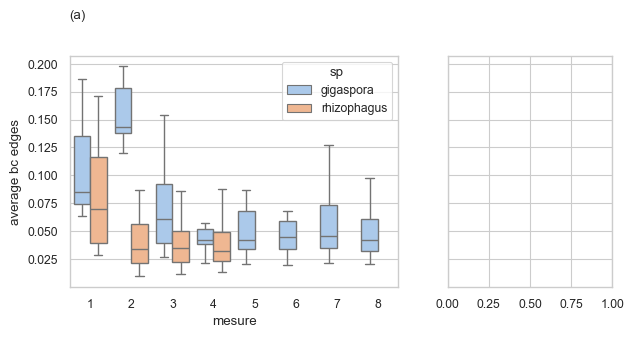

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, width_ratios=[2, 1], figsize=(7, 3))

ax1 = sns.boxplot(x="mesure", y="average bc edges", data=data_bc, 
            palette=palette_pastel, hue="sp", showfliers=False, ax=ax1)




ax1.text(0, 1.2, "(a)", va="top", ha="left", transform=ax1.transAxes)


# Comparaison nouvelle extraction 

In [18]:
data_g_12 = pd.concat([data_g_initial, data_g])
data_g_12

,sp,boite,mesure,photo,nodes,edges,cycle density,total hyphal length,spatial density,num cycles,vitesse de croissance,densité cycles /mm
0,gigaspora,34.0,1.0,G09_10_06_P01.pklclean,188,199,0.063830,106.280808,0.802978,12,106.280808,0.112908
1,gigaspora,34.0,1.0,G09_10_06_P02.pklclean,24,27,0.166667,20.240043,0.901219,4,20.240043,0.197628
2,gigaspora,34.0,1.0,G09_10_06_P03.pklclean,271,295,0.092251,122.427177,1.006685,25,122.427177,0.204203
3,gigaspora,34.0,2.0,G09_16_06_P01.pklclean,27,36,0.370370,9.790577,24.518979,10,4.895289,1.021390
4,gigaspora,34.0,2.0,G09_16_06_P02.pklclean,47,53,0.148936,56.334241,0.869293,7,28.167121,0.124258
5,gigaspora,34.0,2.0,G09_16_06_P04.pklclean,58,60,0.051724,64.594493,0.308196,3,32.297247,0.046444
6,gigaspora,34.0,2.0,G09_16_06_P05.pklclean,58,62,0.086207,94.365565,0.461584,5,47.182783,0.052985
7,gigaspora,34.0,2.0,G09_16_06_P06.pklclean,20,22,0.150000,38.074393,0.518991,3,19.037196,0.078793
0,NaN,NaN,NaN,G09_10_06_P01.pklclean,574,632,0.102787,207.632116,0.860309,59,NaN,0.284156
1,NaN,NaN,NaN,G09_10_06_P02.pklclean,91,111,0.230769,42.092726,0.990616,21,NaN,0.498899


In [26]:
data_g_12.to_excel("data_g12.xlsx", index=False)

In [28]:
data_g_12 = pd.read_excel("data_g12.xlsx")

Text(0.5, 0, 'Index des boites de Petri')

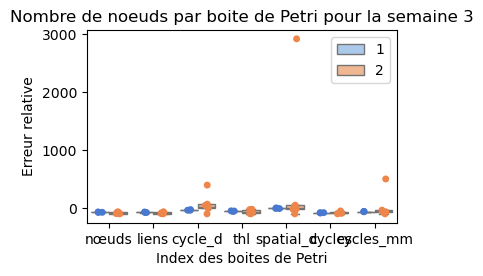

In [33]:
fig, ax = plt.subplots(figsize=(4, 2.5))

ax = sns.boxplot(x="erreur_type", y="erreur_val", data=data_g_12, 
            palette="pastel", hue="mesure", showfliers=False)

sns.stripplot(x="erreur_type", y="erreur_val", hue="mesure", data=data_g_12, 
              palette="muted", dodge=True, legend=False)

ax.legend(loc="best")

ax.set_title("Nombre de noeuds par boite de Petri pour la semaine 3")
ax.set_ylabel("Erreur relative")
ax.set_xlabel("Index des boites de Petri")
# ax.set_yticks([0, 150, 300])

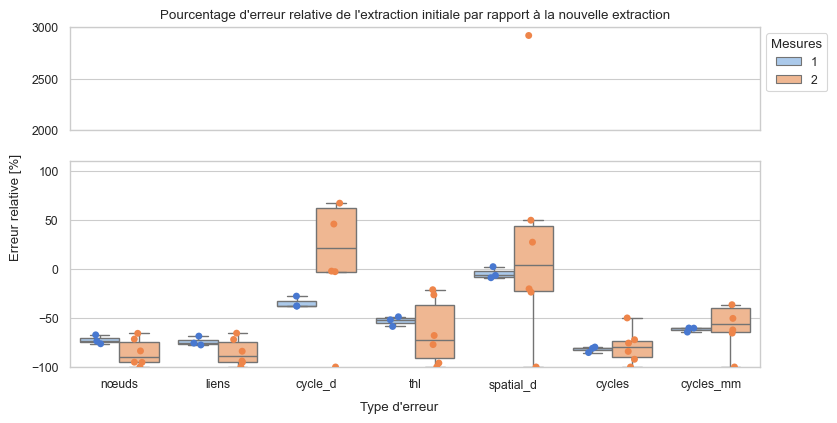

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True, figsize=(10, 4),
                              height_ratios=[0.5, 1])

ax1 = sns.boxplot(x="erreur_type", y="erreur_val", data=data_g_12, 
            palette="pastel", hue="mesure", showfliers=False, ax=ax1)

sns.stripplot(x="erreur_type", y="erreur_val", data=data_g_12, 
            palette="muted", hue="mesure", dodge=True, legend=False, ax=ax1)

ax2 = sns.boxplot(x="erreur_type", y="erreur_val", data=data_g_12, 
            palette="pastel", hue="mesure", showfliers=False, ax=ax2)

sns.stripplot(x="erreur_type", y="erreur_val", data=data_g_12, 
            palette="muted", hue="mesure", dodge=True, legend=False, ax=ax2)

ax1.set_ylim(2000, 3000)
ax2.set_ylim(-100, 110)

ax1.get_xaxis().set_visible(False)

ax1.set_ylabel("")
ax2.set_ylabel("")
ax2.set_xlabel("")

# ax2.set_xticklabels(["Noeuds", "Liens", "Longueur hyphale"])

fig.text(0.1, 0.55, "Erreur relative [%]", va="center", rotation="vertical")
fig.text(0.45, 0.05, "Type d'erreur", va="center", rotation="horizontal")

ax2.get_legend().remove()

ax1.legend(title="Mesures", 
          bbox_to_anchor=(1, 1), loc="upper left")

ax1.set_yticks([2000, 2500, 3000])
ax2.set_yticks([-100, -50, 0, 50, 100])

ax1.set_title("Pourcentage d'erreur relative de l'extraction initiale par rapport à la nouvelle extraction")

fig.subplots_adjust(left=0.16, right=0.85, bottom=0.15, top=1)

fig.savefig("erreur_gigaspora", dpi=250, bbox_inches="tight", pad_inches=0.1)